### Import all the necessary libraries
<hr/>

In [1]:
from keras import backend as K
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.datasets import mnist
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import matplotlib.pyplot as plt

Using TensorFlow backend.


### LeNet Code in Keras:
<hr/>
To define LeNet code, we use a convolutional 2D module, which is:

                keras.layers.convolutional.Conv2D(filters, kernel_size, padding='valid') 
                
Here,
- filters --> No of convolutional kernels we are using
- kernel_size --> Its is an integer or tuple/list of two integers, specifies width and height of 2D convolution window(<b>can be a single integer to specify the same value for all spatial dimensions</b>)
- padding = 'valid' --> It means that convolution is only computed when the input and filter fully overlap, and therefore the output is smaller than the input.
- padding = 'same' --> We have an output that is same size as the input,for which the area around the input is padded with zeros.


In addition, we use a <b> MaxPooling2D</b> module:

        keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=(2, 2))
        
Here,
- pool_size=(2,2)--> It is a tuple of two integers representing the factors by which the image is vertically and horizontally downscaled. <b>So (2, 2) will halve the image in each dimension.</b>
- strides=(2, 2)--> is the stride used for processing

<b>stride<b> is how much a filter is shifted on an image with each step

In [2]:
#define the ConvNet
class LeNet:
    @staticmethod
    def build(input_shape, classes):
        model = Sequential() # Sequential model
     
        # CONV => RELU => POOL
        
        model.add(Conv2D(20, kernel_size=5, padding="same",input_shape=input_shape))
        # 20 ->  Convolutional kernel
        # kernel_size = 5 --> Specify the value of spatial dimensions.
        # padding ='same' --> We have an output same size as the input.
        # input_shape --> input shape of the image
        
        model.add(Activation("relu"))
        # Activation --> Relu
        
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        # pool_size = (2,2) --> Represents factors in which the image is vertically and horizontally downscaled.
        
       
        # CONV => RELU => POOL
        model.add(Conv2D(50, kernel_size=5, border_mode="same"))
        model.add(Activation("relu"))
        model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
        
        
        
        # Flatten => RELU layers   
        model.add(Flatten())
        model.add(Dense(500))
        model.add(Activation("relu"))
        
        # a softmax classifier
        model.add(Dense(classes))
        model.add(Activation("softmax"))
        return model

### Network and Training:

In [3]:
# network and training
NB_EPOCH = 1
BATCH_SIZE = 128
VERBOSE = 1
OPTIMIZER = Adam()
VALIDATION_SPLIT=0.2
IMG_ROWS, IMG_COLS = 28, 28 # input image dimensions
NB_CLASSES = 10 # number of outputs = number of digits
INPUT_SHAPE = (1, IMG_ROWS, IMG_COLS)
# data: shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
print("Shape of Training dataset Images:",X_train.shape)
print("Shape of Training dataset labels:",y_train.shape)

Shape of Training dataset Images: (60000, 28, 28)
Shape of Training dataset labels: (60000,)


In [5]:
print("Shape of Testing dataset Images:",X_test.shape)
print("Shape of Testing dataset labels:",y_test.shape)

Shape of Testing dataset Images: (10000, 28, 28)
Shape of Testing dataset labels: (10000,)


In [6]:
print(K)

<module 'keras.backend' from 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\keras\\backend\\__init__.py'>


In [7]:
K.set_image_dim_ordering("th")

In [8]:
# consider them as float and normalize
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255


In [9]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


<b>neweaxis</b> -> is used to increase the dimensions of the existing array by 1 more dimension when used once.

- <b>1D</b> array will become <b>2D</b>
- <b>2D</b> array will become <b>3D</b>
- <b>3D</b> array will become <b>4D</b>
<img src="https://i.stack.imgur.com/59qHE.png"/>

In [10]:
# we need a 60K x [1 x 28 x 28] shape as input to the CONVNET
X_train = X_train[:, np.newaxis, :, :]
print(X_train.shape)

(60000, 1, 28, 28)


In [11]:
X_test = X_test[:, np.newaxis, :, :]
print(X_test.shape)

(10000, 1, 28, 28)


In [12]:
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [13]:
print("Training Sample Shape:",X_train.shape)
print("Testing Sample Shape:",X_test.shape)

Training Sample Shape: (60000, 1, 28, 28)
Testing Sample Shape: (10000, 1, 28, 28)


### Performing One Hot encoding:

In [14]:
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, NB_CLASSES)
y_test = np_utils.to_categorical(y_test, NB_CLASSES)

In [15]:
# initialize the optimizer and model
model = LeNet.build(input_shape=INPUT_SHAPE, classes=NB_CLASSES)
model.compile(loss="categorical_crossentropy", optimizer=OPTIMIZER,
metrics=["accuracy"])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, kernel_size=5, padding="same")`


### Training:

In [ ]:
history = model.fit(X_train, y_train,
batch_size=BATCH_SIZE, epochs=NB_EPOCH,
verbose=VERBOSE, validation_split=VALIDATION_SPLIT)

Train on 48000 samples, validate on 12000 samples
Epoch 1/1
 8448/48000 [====>.........................] - ETA: 5:01 - loss: 0.5990 - acc: 0.8143

In [24]:
score = model.evaluate(X_test, y_test, verbose=VERBOSE)

10000/10000 [==============================] - 23s 2ms/step


In [25]:
print("Test score:", score[0])
print('Test accuracy:', score[1])

Test score: 0.0521683846176
Test accuracy: 0.9835


In [26]:
# list all data in history
print(history.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


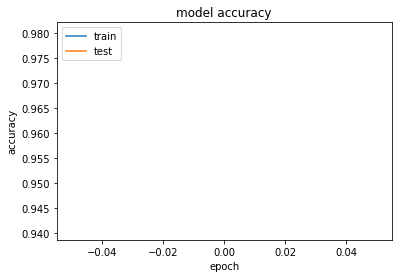

In [27]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

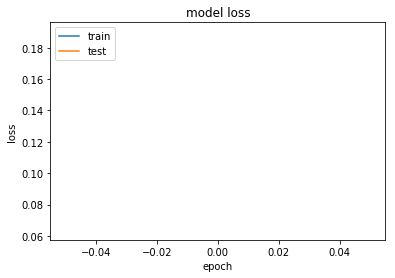

In [28]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()